In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, robust_scale
from sklearn.metrics import mean_squared_error, r2_score

In [149]:
data = pd.read_csv('rank_salary.csv')

In [150]:
data.head()

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [152]:
data.isna().sum()

,0
Position,0
Level,0
Salary,0


In [153]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Level,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Salary,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


##Exploratory Data Analysis (EDA)

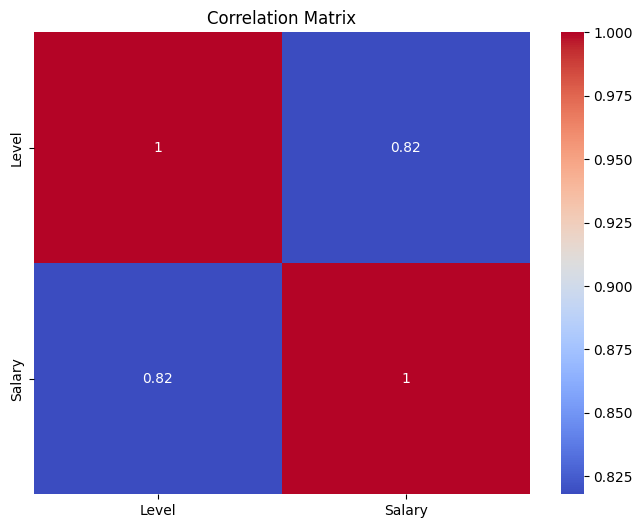

In [154]:
corr = data.drop(columns = 'Position').corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

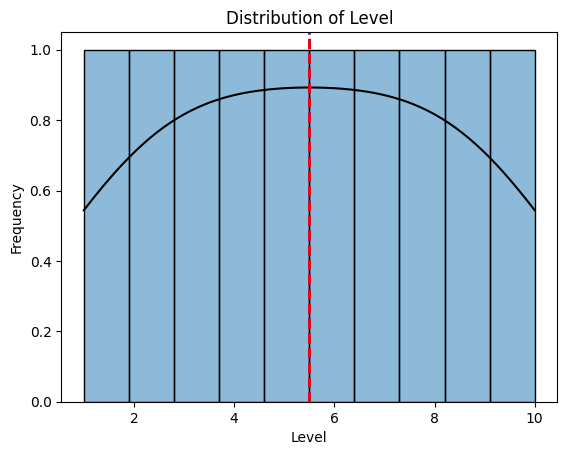

In [155]:
# Distribution of Levels
hist = sns.histplot(data['Level'], bins = 10, kde = True)
hist.lines[0].set_color("black")
hist.axvline(x = data['Level'].mean(), color = 'b', label = "Mean", linestyle = '--', linewidth = 2)
hist.axvline(x = data['Level'].median(), color = 'r', label = 'Median', linestyle = '--', linewidth = 2)
plt.title("Distribution of Level")
plt.xlabel("Level")
plt.ylabel("Frequency")
plt.show()

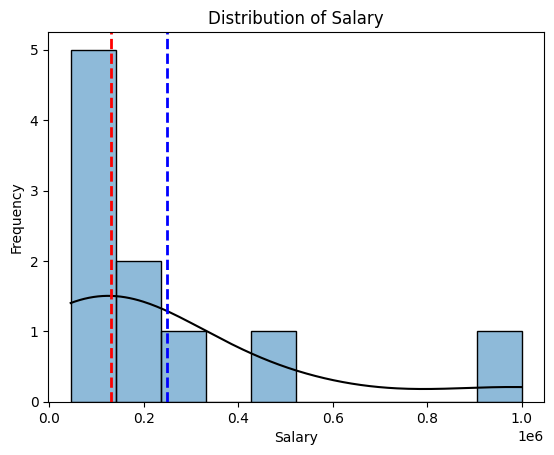

In [156]:
# Distribution of Salary
hist = sns.histplot(data['Salary'], bins = 10, kde = True)
hist.lines[0].set_color("black")
hist.axvline(x = data['Salary'].mean(), color = 'b', label = "Mean", linestyle = '--', linewidth = 2)
hist.axvline(x = data['Salary'].median(), color = 'r', label = 'Median', linestyle = '--', linewidth = 2)
plt.title("Distribution of Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='Salary'>

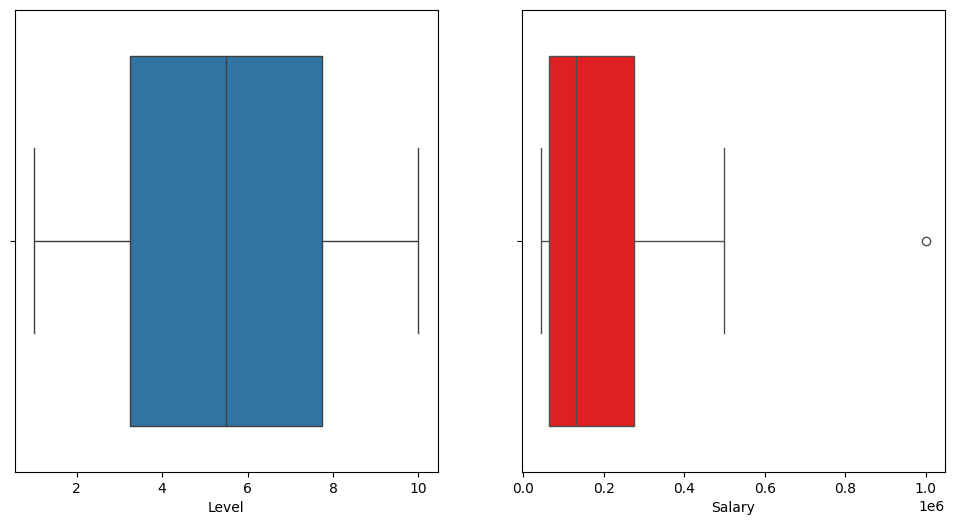

In [157]:
# Box plot
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.boxplot(x = 'Level', data = data, ax = ax[0])
sns.boxplot(x = 'Salary', data = data, ax = ax[1], color = 'red')

### Split data into X, y

In [158]:
X = data[["Level"]]
y = data["Salary"]

## Model Selection and Training

###Split into X_train, X_test, y_train, y_test

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [161]:
model = LinearRegression()

### Second degree polynomial

In [160]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [162]:
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

In [163]:
# Test overfitting
print("PolynomialRegression Train Score: ", model.score(X_train_poly, y_train))
print("PolynomialRegression Test Score: ", model.score(X_test_poly, y_test))

PolynomialRegression Train Score:  0.928077628049796
PolynomialRegression Test Score:  0.7666492889299961


### Third degree polynomial

In [169]:
poly = PolynomialFeatures(degree = 3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [170]:
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

In [171]:
# Test overfitting
print("PolynomialRegression Train Score: ", model.score(X_train_poly, y_train))
print("PolynomialRegression Test Score: ", model.score(X_test_poly, y_test))

PolynomialRegression Train Score:  0.9913280453724184
PolynomialRegression Test Score:  0.8762695647830065


### Fourth degree polynomial

In [172]:
poly = PolynomialFeatures(degree = 4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [173]:
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

In [174]:
# Test overfitting
print("PolynomialRegression Train Score: ", model.score(X_train_poly, y_train))
print("PolynomialRegression Test Score: ", model.score(X_test_poly, y_test))

PolynomialRegression Train Score:  0.9995857211026754
PolynomialRegression Test Score:  0.9714666803842444


## Model Evaluation

In [175]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1444499305.55


In [176]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

R-squared: 0.97
